### 前言
       今天继续我们的python绘图系列，针对离散变量我们可以使用常见的条形图和饼图完成数据的可视化工作，那么，针对数值型变量，我们也有很多可视化的方法，例如箱线图、直方图、折线图、面积图、散点图等等。这一期，我们就先来介绍一下数值型变量的箱线图绘制。箱线图一般用来展现数据的分布（如上下四分位值、中位数等），同时，也可以用箱线图来反映数据的异常情况。

#### boxplot函数的参数解读
       绘图之前，我们先来讲解一下matplotlib包中boxplot函数的参数含义及使用方法：
plt.boxplot(x, notch=None, sym=None, vert=None, 
             whis=None, positions=None, widths=None, 
             patch_artist=None, meanline=None, showmeans=None, 
             showcaps=None, showbox=None, showfliers=None, 
             boxprops=None, labels=None, flierprops=None, 
             medianprops=None, meanprops=None, 
             capprops=None, whiskerprops=None)

* x：指定要绘制箱线图的数据；

* notch：是否是凹口的形式展现箱线图，默认非凹口；

* sym：指定异常点的形状，默认为+号显示；

* vert：是否需要将箱线图垂直摆放，默认垂直摆放；

* whis：指定上下须与上下四分位的距离，默认为1.5倍的四分位差；

* positions：指定箱线图的位置，默认为[0,1,2…]；

* widths：指定箱线图的宽度，默认为0.5；

* patch_artist：是否填充箱体的颜色；

* meanline：是否用线的形式表示均值，默认用点来表示；

* showmeans：是否显示均值，默认不显示；

* showcaps：是否显示箱线图顶端和末端的两条线，默认显示；

* showbox：是否显示箱线图的箱体，默认显示；

* showfliers：是否显示异常值，默认显示；

* boxprops：设置箱体的属性，如边框色，填充色等；

* labels：为箱线图添加标签，类似于图例的作用；

* filerprops：设置异常值的属性，如异常点的形状、大小、填充色等；

* medianprops：设置中位数的属性，如线的类型、粗细等；

* meanprops：设置均值的属性，如点的大小、颜色等；

* capprops：设置箱线图顶端和末端线条的属性，如颜色、粗细等；

* whiskerprops：设置须的属性，如颜色、粗细、线的类型等；

### 饼图的绘制
#### 案例：titanic：不同等级仓位的年龄箱线图

* 整体乘客的年龄箱线图

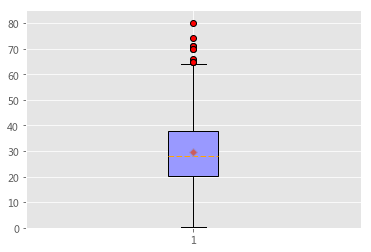

In [1]:
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt

# 读取Titanic数据集
titanic = pd.read_csv('../input/pandas_exercise/exercise_data//train.csv')
# 检查年龄是否有缺失
any(titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
titanic.dropna(subset=['Age'], inplace=True)

# 设置图形的显示风格
plt.style.use('ggplot')

# 设置中文和负号正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 绘图：整体乘客的年龄箱线图
plt.boxplot(x = titanic.Age, # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色
# 设置y轴的范围
plt.ylim(0,85)

# 去除箱线图的上边框与右边框的刻度标签
plt.tick_params(top='off', right='off')
# 显示图形
plt.show()

对于所有乘客而言，从图中容易发现，乘客的平均年龄在30岁，有四分之一的人低于20岁，另有四分之一的人超过38岁，换句话说，有一半的人，年龄落在20~38岁之间；从均值（红色的菱形）略高于中位数（黄色虚线）来看，说明年龄是有偏的，并且是右偏；同时，我们也会发现一些红色的异常值，这些异常值的年龄均在64岁以上。


* 不同等级仓的年龄箱线图

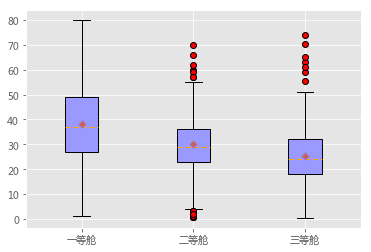

In [2]:
# 按舱级排序，为了后面正常显示分组盒形图的顺序
titanic.sort_values(by = 'Pclass', inplace=True)

# 通过for循环将不同仓位的年龄人群分别存储到列表Age变量中
Age = []
Levels = titanic.Pclass.unique()
for Pclass in Levels:
    Age.append(titanic.loc[titanic.Pclass==Pclass,'Age'])

# 绘图
plt.boxplot(x = Age, 
            patch_artist=True,
            labels = ['一等舱','二等舱','三等舱'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 显示图形
plt.show()

如果对人群的年龄按不同的舱位来看，我们会发现一个明显的趋势，就是舱位等级越高的乘客，他们的年龄越高，三种舱位的平均年龄为38、30和25，说明年龄越是偏大一点，他们的经济能力会越强一些，所买的舱位等级可能就会越高一些。同时，在二等舱和三等舱内，乘客的年龄上存在一些异常用户。

结语
       OK，今天关于Pyhton绘制箱线图的讲解就到此结束，如果你感兴趣，不妨和我一起学习与交流，同时也欢迎各位朋友继续转发与分享，让系统的知识不断的扩散出去。下一期我们将推送直方图的绘制。
       
* 欢迎关注“每天进步一点点2015”，跟多的知识等待和你一起交流~